In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.3.3'

In [9]:
# 1) Load data
# car_df = pd.read_csv('car_fuel_efficiency.csv', encoding='ascii')
car_df = pd.read_csv('car_fuel_efficiency.csv')
print(car_df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [10]:
# Q2: Records count
q2_count = car_df.shape[0]
print(q2_count)

9704


In [11]:
# Q3: Number of unique fuel types
q3_fuel_types = car_df['fuel_type'].nunique(dropna=True)
print(q3_fuel_types)

2


In [12]:
# Q4: How many columns have missing values
q4_missing_cols = car_df.isna().sum()
q4_missing_count = (q4_missing_cols > 0).sum()
print(q4_missing_count)

4


In [14]:
# Q5: Max fuel efficiency of cars from Asia
asia_df = car_df[car_df['origin'] == 'Asia']
q5_max_asia = asia_df['fuel_efficiency_mpg'].max()
print(q5_max_asia)

23.759122836520497


In [15]:
# Q6: Median horsepower before and after filling with mode
hp_median_before = car_df['horsepower'].median()
# mode: most frequent value (dropna True by default)
hp_mode_series = car_df['horsepower'].mode()
hp_mode = hp_mode_series.iloc[0] if len(hp_mode_series) > 0 else np.nan
car_df_hp_filled = car_df.copy()
car_df_hp_filled['horsepower'] = car_df_hp_filled['horsepower'].fillna(hp_mode)
hp_median_after = car_df_hp_filled['horsepower'].median()
print(hp_median_before)
print(hp_mode)
print(hp_median_after)

149.0
152.0
152.0


In [16]:
# Q7: Linear regression style calc per instructions
asia_X = asia_df[['vehicle_weight', 'model_year']].head(7).to_numpy()
X = asia_X
XTX = X.T.dot(X)
# Invert XTX
XTX_inv = np.linalg.inv(XTX)
# y array
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])
# w = (XTX_inv) * X.T * y
w = XTX_inv.dot(X.T).dot(y)
sum_w = w.sum()
print(w)
print(sum_w)

[0.01386421 0.5049067 ]
0.5187709081074016


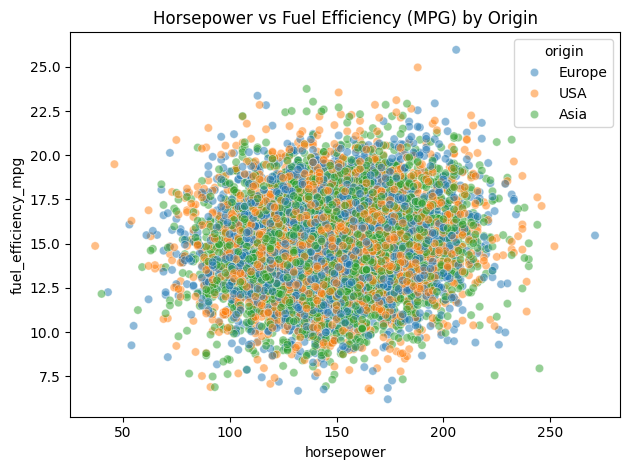

In [17]:
# Quick visualization: horsepower vs mpg to sanity check distribution
sns.scatterplot(data=car_df, x='horsepower', y='fuel_efficiency_mpg', hue='origin', alpha=0.5)
plt.title('Horsepower vs Fuel Efficiency (MPG) by Origin')
plt.tight_layout()
plt.show()

In [18]:
# Follow steps 1-9 exactly and print each intermediate as requested; also compute the final sum
import pandas as pd
import numpy as np

# Load once (if already loaded earlier, this will just overwrite locally)
df_cars = pd.read_csv('car_fuel_efficiency.csv', encoding='ascii')
print(df_cars.head())

# 1. Cars from Asia
cars_asia = df_cars[df_cars['origin'] == 'Asia']
print(cars_asia.head())

# 2. Select columns vehicle_weight and model_year
cars_asia_two = cars_asia[['vehicle_weight', 'model_year']]
print(cars_asia_two.head())

# 3. First 7 values
cars_asia_two_head7 = cars_asia_two.head(7)
print(cars_asia_two_head7)

# 4. NumPy array X
X = cars_asia_two_head7.to_numpy()
print(X)

# 5. XTX = X.T @ X
XTX = X.T.dot(X)
print(XTX)

# 6. Invert XTX
XTX_inv = np.linalg.inv(XTX)
print(XTX_inv)

# 7. y array
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])
print(y)

# 8. w = XTX_inv @ X.T @ y
w = XTX_inv.dot(X.T).dot(y)
print(w)

# 9. Sum of elements in w
sum_w = float(w.sum())
print(sum_w)

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         